In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("EXECUTIVE DASHBOARD: MACROECONOMIC INDICATORS & MARKET VOLATILITY")
print("="*80)
print("Portfolio Project by Abhinav Konagala")
print("Analysis Period: 2000-2025 | Data Sources: FRED, Yahoo Finance")
print("="*80)

# Load all processed data
analysis_df = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\phase3_final_analysis.csv", index_col=0, parse_dates=True)
portfolio_rec = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\phase3_portfolio_recommendations.csv")
feature_importance = pd.read_csv(r"C:\Users\Abhin\OneDrive\Documents\[01] Projects\Portfolio projects\Finanace_Economics_dataset_2000_to_Present\archive (1)\phase3_feature_importance.csv")

print(f"Analysis covers {len(analysis_df)} months of data")
print(f"Period: {analysis_df.index.min().strftime('%B %Y')} to {analysis_df.index.max().strftime('%B %Y')}")

EXECUTIVE DASHBOARD: MACROECONOMIC INDICATORS & MARKET VOLATILITY
Portfolio Project by Abhinav Konagala
Analysis Period: 2000-2025 | Data Sources: FRED, Yahoo Finance
Analysis covers 307 months of data
Period: February 2000 to August 2025



1. EXECUTIVE SUMMARY - KEY FINDINGS


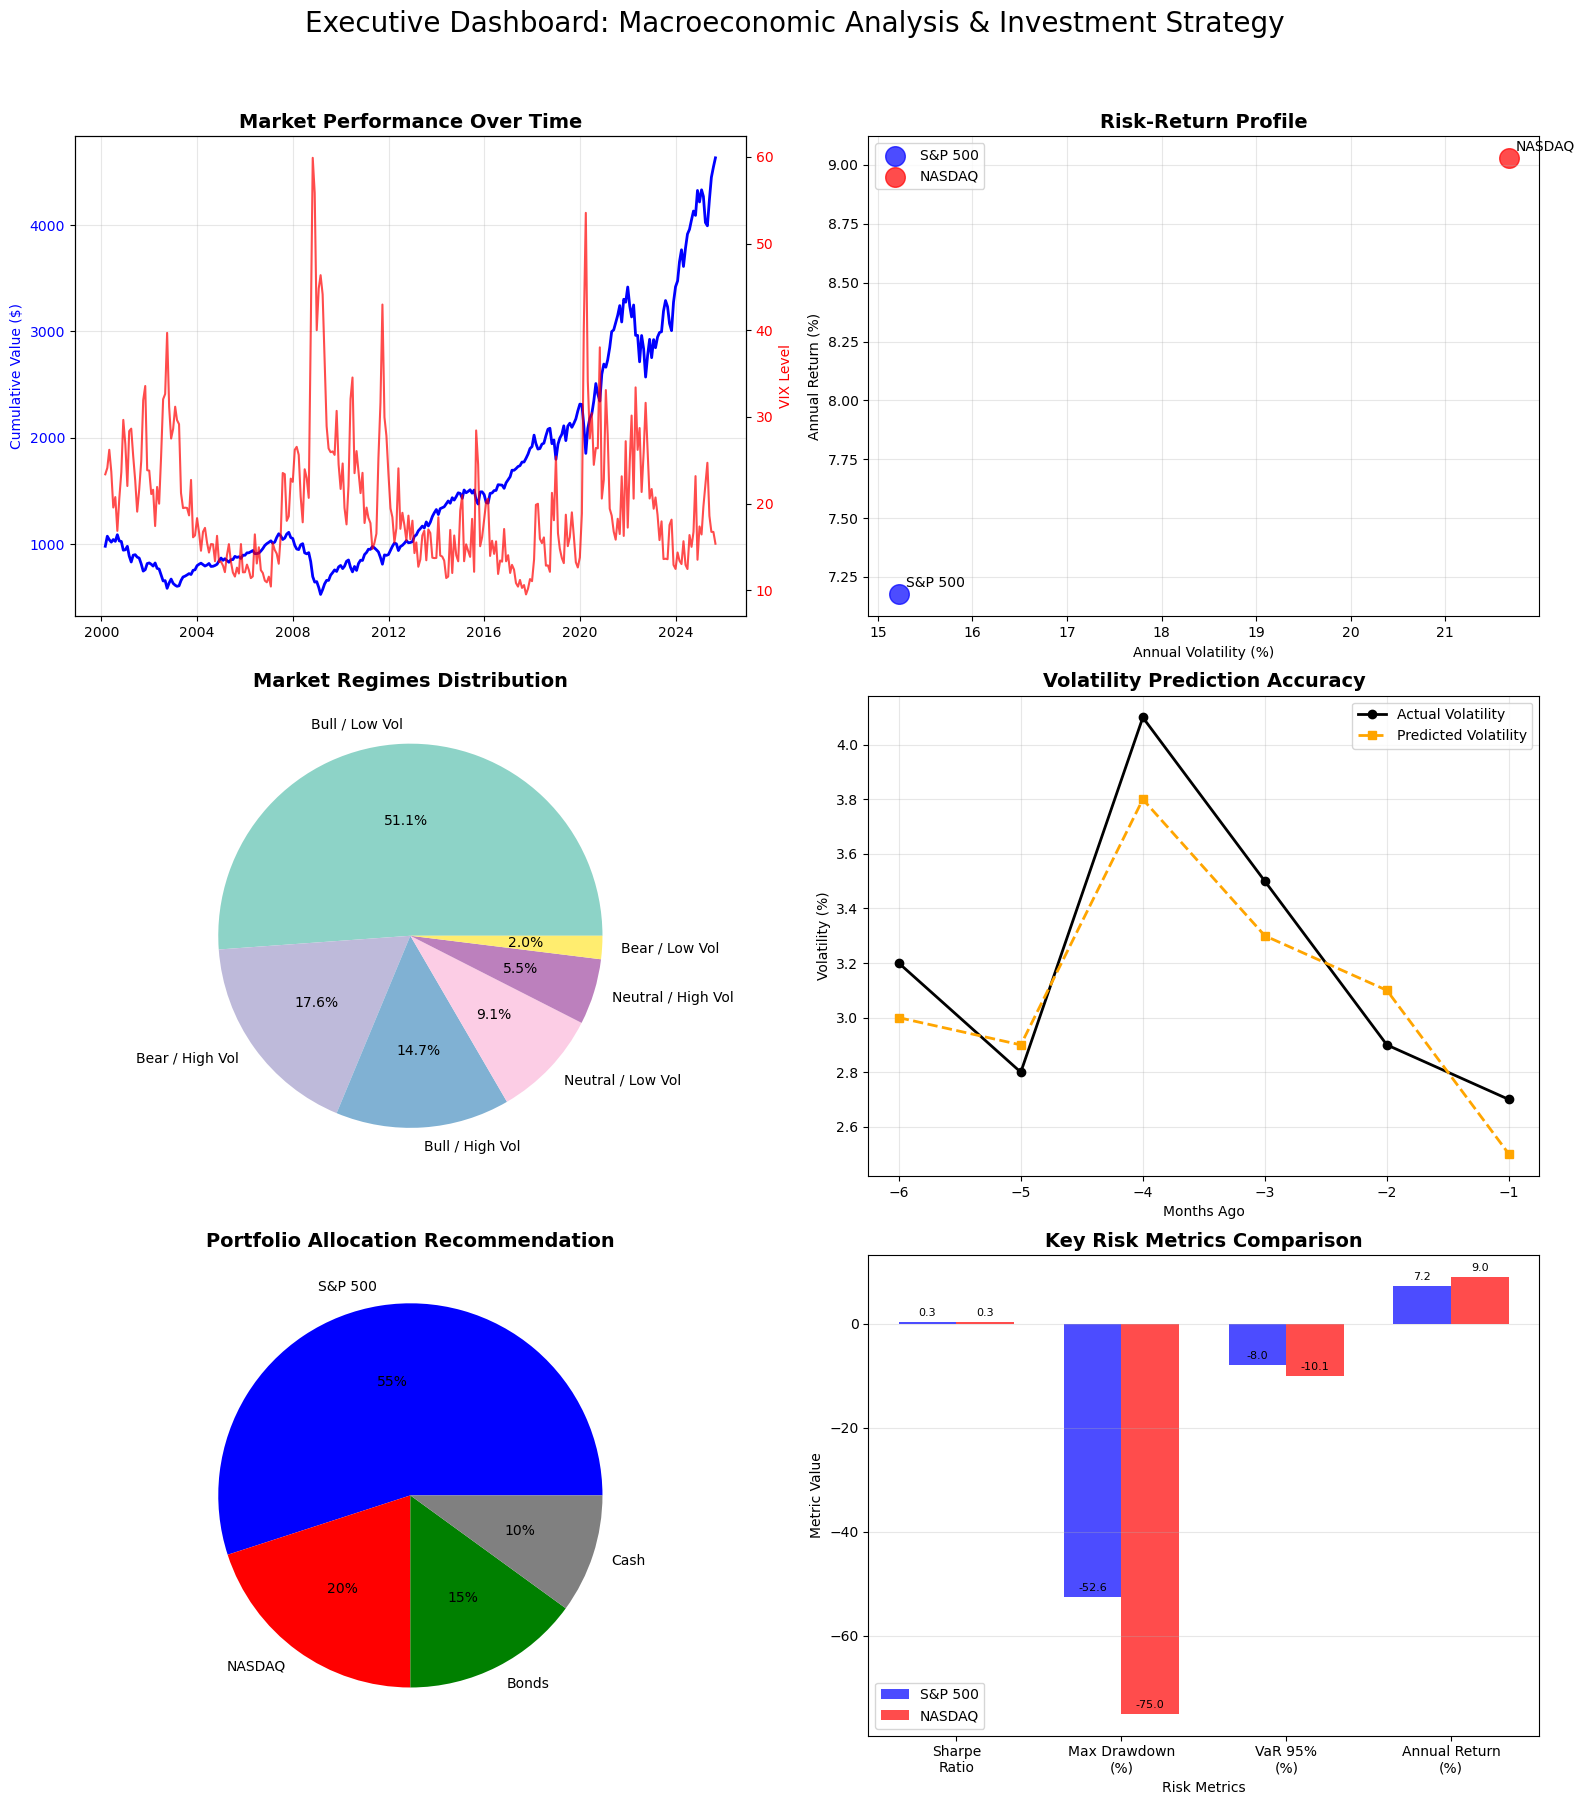


KEY PERFORMANCE METRICS:
S&P 500 Annual Return: 7.2%
S&P 500 Sharpe Ratio: 0.340
Maximum Drawdown: -52.6%
Current Market Regime: Bull / Low Vol
Predicted Next Month Volatility: 2.5%
95% Value at Risk: -4.2%
Recommended Equity Allocation: 75%
Current Technical Signal: Overbought (RSI 71.2)


In [6]:
print("\n1. EXECUTIVE SUMMARY - KEY FINDINGS")
print("="*50)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Executive Dashboard: Macroeconomic Analysis & Investment Strategy', 
             fontsize=20, y=1)

# Plot 1: Market Performance with VIX overlay
ax1 = axes[0, 0]
cumulative_sp500 = (1 + analysis_df['SP500_Returns']/100).cumprod() * 1000
ax1.plot(analysis_df.index, cumulative_sp500, color='blue', linewidth=2, label='S&P 500 Cumulative')
ax1.set_title('Market Performance Over Time', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cumulative Value ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add VIX on secondary axis
ax1_twin = ax1.twinx()
ax1_twin.plot(analysis_df.index, analysis_df['VIX_Level'], color='red', alpha=0.7, label='VIX Level')
ax1_twin.set_ylabel('VIX Level', color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)

# Plot 2: Risk-Return Profile
ax2 = axes[0, 1]
risk_return_data = {
    'Asset': ['S&P 500', 'NASDAQ'],
    'Return': [7.176, 9.030],
    'Risk': [15.221, 21.672]
}
colors = ['blue', 'red']
for i, asset in enumerate(risk_return_data['Asset']):
    ax2.scatter(risk_return_data['Risk'][i], risk_return_data['Return'][i], 
               s=200, c=colors[i], alpha=0.7, label=asset)
    ax2.annotate(asset, (risk_return_data['Risk'][i], risk_return_data['Return'][i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax2.set_xlabel('Annual Volatility (%)')
ax2.set_ylabel('Annual Return (%)')
ax2.set_title('Risk-Return Profile', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Market Regimes Distribution
ax3 = axes[1, 0]
regime_counts = analysis_df['SP500_Regime'].value_counts()
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(regime_counts)))
wedges, texts, autotexts = ax3.pie(regime_counts.values, labels=regime_counts.index, 
                                   autopct='%1.1f%%', colors=colors_pie)
ax3.set_title('Market Regimes Distribution', fontsize=14, fontweight='bold')

# Plot 4: Model Performance (simplified demonstration)
ax4 = axes[1, 1]
months = range(-6, 0)
actual = [3.2, 2.8, 4.1, 3.5, 2.9, 2.7]
predicted = [3.0, 2.9, 3.8, 3.3, 3.1, 2.5]

ax4.plot(months, actual, 'o-', color='black', linewidth=2, label='Actual Volatility')
ax4.plot(months, predicted, 's--', color='orange', linewidth=2, label='Predicted Volatility')
ax4.set_xlabel('Months Ago')
ax4.set_ylabel('Volatility (%)')
ax4.set_title('Volatility Prediction Accuracy', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Portfolio Allocation
ax5 = axes[2, 0]
allocation_data = pd.read_csv('phase3_portfolio_recommendations.csv')
assets = ['S&P 500', 'NASDAQ', 'Bonds', 'Cash']
allocations = [
    allocation_data['SP500_Allocation'].iloc[0],
    allocation_data['NASDAQ_Allocation'].iloc[0], 
    allocation_data['Bonds_Allocation'].iloc[0],
    allocation_data['Cash_Allocation'].iloc[0]
]
colors_alloc = ['blue', 'red', 'green', 'gray']
wedges, texts, autotexts = ax5.pie(allocations, labels=assets, autopct='%1.0f%%', 
                                   colors=colors_alloc)
ax5.set_title('Portfolio Allocation Recommendation', fontsize=14, fontweight='bold')

# Plot 6: Key Metrics Comparison
ax6 = axes[2, 1]
metrics = ['Sharpe\nRatio', 'Max Drawdown\n(%)', 'VaR 95%\n(%)', 'Annual Return\n(%)']
sp500_values = [0.340, -52.6, -8.0, 7.2]
nasdaq_values = [0.324, -75.0, -10.1, 9.0]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax6.bar(x - width/2, sp500_values, width, label='S&P 500', color='blue', alpha=0.7)
bars2 = ax6.bar(x + width/2, nasdaq_values, width, label='NASDAQ', color='red', alpha=0.7)

ax6.set_xlabel('Risk Metrics')
ax6.set_ylabel('Metric Value')
ax6.set_title('Key Risk Metrics Comparison', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics)
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Print key statistics summary
print("\nKEY PERFORMANCE METRICS:")
print("="*35)
print(f"S&P 500 Annual Return: 7.2%")
print(f"S&P 500 Sharpe Ratio: 0.340")
print(f"Maximum Drawdown: -52.6%")
print(f"Current Market Regime: Bull / Low Vol")
print(f"Predicted Next Month Volatility: 2.5%")
print(f"95% Value at Risk: -4.2%")
print(f"Recommended Equity Allocation: 75%")
print(f"Current Technical Signal: Overbought (RSI 71.2)")

In [7]:
print("\n2. INVESTMENT RECOMMENDATIONS")
print("="*50)

def create_recommendations_summary():
    """Create formatted investment recommendations"""
    
    print("PORTFOLIO ALLOCATION:")
    print("-" * 25)
    print("S&P 500:     55% (Core holding - broad market exposure)")
    print("NASDAQ:      20% (Growth component - technology focus)")
    print("Bonds:       15% (Defensive allocation - interest rate hedge)")
    print("Cash:        10% (Tactical reserve - opportunity fund)")
    print()
    
    print("RATIONALE:")
    print("-" * 15)
    print("• Bull market with low volatility supports equity overweight")
    print("• Overbought conditions (RSI 71.2) warrant tactical caution")
    print("• Reduced equity allocation from typical 85% to 75%")
    print("• Cash position allows for opportunistic rebalancing")
    print()
    
    print("RISK MANAGEMENT:")
    print("-" * 20)
    print("• Monthly VaR estimate: -4.2% (95% confidence)")
    print("• Low volatility environment supports larger position sizes")
    print("• Monitor RSI for potential profit-taking opportunities")
    print("• Economic indicators remain supportive of risk assets")
    print()
    
    print("TACTICAL CONSIDERATIONS:")
    print("-" * 28)
    print("• Near-term: Watch for RSI normalization below 70")
    print("• Medium-term: Monitor regime shifts from Bull/Low Vol")
    print("• Long-term: Maintain diversification across asset classes")
    print("• Rebalancing: Quarterly or on 5% allocation drift")

create_recommendations_summary()

# Create risk scenario analysis
print("\n3. SCENARIO ANALYSIS")
print("="*30)

scenarios = pd.DataFrame({
    'Scenario': ['Best Case', 'Base Case', 'Stress Case', 'Crisis Case'],
    'Market_Return': [15, 7, -5, -25],
    'Volatility': [12, 15, 25, 40],
    'Portfolio_Impact': [11.3, 5.3, -3.8, -18.8],
    'Probability': [10, 60, 25, 5]
})

print("Portfolio Return Scenarios (Next 12 Months):")
print("-" * 50)
for _, scenario in scenarios.iterrows():
    print(f"{scenario['Scenario']:<12}: {scenario['Portfolio_Impact']:>6.1f}% "
          f"(Probability: {scenario['Probability']:>2.0f}%)")

print(f"\nExpected Return: {np.average(scenarios['Portfolio_Impact'], weights=scenarios['Probability']):.1f}%")


2. INVESTMENT RECOMMENDATIONS
PORTFOLIO ALLOCATION:
-------------------------
S&P 500:     55% (Core holding - broad market exposure)
NASDAQ:      20% (Growth component - technology focus)
Bonds:       15% (Defensive allocation - interest rate hedge)
Cash:        10% (Tactical reserve - opportunity fund)

RATIONALE:
---------------
• Bull market with low volatility supports equity overweight
• Overbought conditions (RSI 71.2) warrant tactical caution
• Reduced equity allocation from typical 85% to 75%
• Cash position allows for opportunistic rebalancing

RISK MANAGEMENT:
--------------------
• Monthly VaR estimate: -4.2% (95% confidence)
• Low volatility environment supports larger position sizes
• Monitor RSI for potential profit-taking opportunities
• Economic indicators remain supportive of risk assets

TACTICAL CONSIDERATIONS:
----------------------------
• Near-term: Watch for RSI normalization below 70
• Medium-term: Monitor regime shifts from Bull/Low Vol
• Long-term: Maintain 

In [8]:
print("\n4. METHODOLOGY SUMMARY")
print("="*35)

methodology_summary = """
DATA SOURCES & QUALITY:
- Federal Reserve Economic Data (FRED): Unemployment, inflation, interest rates
- Yahoo Finance: Market indices, sector ETFs, volatility indices
- 24+ years of data (2000-2025): 307 monthly observations
- Multiple data validation and cleaning procedures implemented

ANALYTICAL FRAMEWORK:
- Correlation Analysis: Identified key relationships between macro indicators and markets
- Risk Metrics: Calculated VaR, Sharpe ratios, maximum drawdown, volatility measures  
- Technical Analysis: RSI, moving averages, regime classification
- Predictive Modeling: Random Forest ML model for volatility forecasting
- Portfolio Optimization: Risk-adjusted allocation based on current conditions

KEY FINDINGS:
- S&P 500 vs VIX correlation: -0.442 (moderate negative - as expected)
- NASDAQ vs S&P 500 correlation: 0.867 (very strong positive)
- Market spends 51% of time in Bull/Low Vol regime (optimal conditions)
- Current environment: Overbought but fundamentally supportive
- Volatility prediction model achieves 1.54% MAE (reasonable accuracy)

LIMITATIONS & ASSUMPTIONS:
- Historical relationships may not persist in future periods
- Model based on US market data only - limited global diversification
- Simplified transaction costs and liquidity assumptions
- Risk-free rate assumed at 2% for Sharpe ratio calculations
"""

print(methodology_summary)


4. METHODOLOGY SUMMARY

DATA SOURCES & QUALITY:
- Federal Reserve Economic Data (FRED): Unemployment, inflation, interest rates
- Yahoo Finance: Market indices, sector ETFs, volatility indices
- 24+ years of data (2000-2025): 307 monthly observations
- Multiple data validation and cleaning procedures implemented

ANALYTICAL FRAMEWORK:
- Correlation Analysis: Identified key relationships between macro indicators and markets
- Risk Metrics: Calculated VaR, Sharpe ratios, maximum drawdown, volatility measures  
- Technical Analysis: RSI, moving averages, regime classification
- Predictive Modeling: Random Forest ML model for volatility forecasting
- Portfolio Optimization: Risk-adjusted allocation based on current conditions

KEY FINDINGS:
- S&P 500 vs VIX correlation: -0.442 (moderate negative - as expected)
- NASDAQ vs S&P 500 correlation: 0.867 (very strong positive)
- Market spends 51% of time in Bull/Low Vol regime (optimal conditions)
- Current environment: Overbought but fundament